# CASE STUDY
## Fraud Detection Analysis

In [554]:
# Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [555]:
# Read data from file to a dataframe

df = pd.read_csv('loan.csv')
df.head()

/Users/sudhanshu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### While loading data it is observed that column number 47 has mixed data types and "DtypeWarning" is seen

In [556]:
# Getting information regarding data set

df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [557]:
# Getting information regarding data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [558]:
# Getting information regarding data set

df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [559]:
# Inspecting shape of dataframe

df.shape

(39717, 111)

### Total 111 columns are present in the dataframe. By looking at the data it is seen that a lot of columns contain only NaN values. So next step is to identify those columns and delete them

In [560]:
# Finding column-wise null percentages

columnWiseNullPercent = (df.isnull().sum(axis = 0)/len(df.index)) * 100

# Rounding the percentages to 2 decimal points

round(columnWiseNullPercent, 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

### Deleting all comuns which have all of their values as NaN

In [561]:
# Dropping columns

df = df.dropna(axis = 1, how = 'all')

### Now we will check NaN percentages again to find out if we can remove other columns which have high number of NaN values

In [562]:
# Finding column-wise null percentages

columnWiseNullPercent = (df.isnull().sum(axis = 0)/len(df.index)) * 100

# Rounding the percentages to 2 decimal points

round(columnWiseNullPercent, 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### We know that "id" column contains data to identify different loans. So we will check if all these rows are unique and do not contain duplicate data

In [563]:
# Checking unique number of "id" values equal to number of rows
# If "True", no dupicate records are present

duplicate_check = (df.id.nunique() == df.shape[0])
print("No duplicate records" if duplicate_check else "Duplicate records exist")

No duplicate records


In [564]:
# Checking the shape of modified dataframe.

df.shape

(39717, 57)

### From above information, we see that there are some NaN values in "emp_length" and "pub_rec_bankruptcies". We can assume that if "emp_length" is not mentioned we can take it as 0 and similarly for "pub_rec_bankruptcies".

In [565]:
# Seeting values for columns where value = NaN

df["emp_length"].fillna(0, inplace = True)
df["pub_rec_bankruptcies"].fillna(0, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### It is also noticed that many columns do not contain NaN values but many of the values in column are 0. We will first confirm it and then remove those columns as well.
### Also some columns have same str value in all the rows. We will identify and delete those columns too

In [566]:
# Checking for "chargeoff_within_12_mths"

df[df.chargeoff_within_12_mths > 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [567]:
# Checking for "collections_12_mths_ex_med"

df[df.collections_12_mths_ex_med > 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [568]:
# Checking for "tax_liens"

df[df.tax_liens > 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [569]:
# Checking for "initial_list_status"

df[df.initial_list_status != 'f']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [570]:
# Checking for "pymnt_plan"

df[df.pymnt_plan != 'n']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [571]:
# Checking for "application_type"

df[df.application_type != 'INDIVIDUAL']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [572]:
# Checking for "acc_now_delinq"

df[df.acc_now_delinq != 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [573]:
# Checking for "delinq_amnt"

df[df.delinq_amnt != 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


### Now we will drop some more columns after deciding that they will not impact our analysis

In [574]:
# Dropping columns which are not important for analysis

columnsToDrop = ['next_pymnt_d', 
                 'acc_now_delinq', 
                 'delinq_amnt', 
                 'application_type', 
                 'initial_list_status', 
                 'last_pymnt_d', 
                 'emp_title', 
                 'out_prncp', 
                 'out_prncp_inv', 
                 'total_pymnt_inv',  
                 'recoveries', 
                 'collection_recovery_fee', 
                 'pymnt_plan', 
                 'policy_code', 
                 'title', 
                 'desc', 
                 'url', 
                 'zip_code', 
                 'mths_since_last_delinq', 
                 'mths_since_last_record', 
                 'chargeoff_within_12_mths', 
                 'collections_12_mths_ex_med', 
                 'tax_liens']

df = df.drop(columnsToDrop, axis=1)

### Checking final state of dataframe after cleaning

In [575]:
# Checking shape

df.shape

(39717, 34)

In [576]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,13648,83.70%,9,5863.155187,5000.00,863.16,0.00,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1687,9.40%,4,1008.710000,456.46,435.17,0.00,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2956,98.50%,10,3005.666844,2400.00,605.67,0.00,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,5598,21%,37,12231.890000,10000.00,2214.92,16.97,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,27783,53.90%,38,3513.330000,2475.94,1037.39,0.00,67.79,May-16,0.0


### Changing data types of some columns as per requirement 

In [577]:
# Splitting and removing the percentage sign

df['int_rate'] = df['int_rate'].apply(lambda x: x.split('%')[0]).astype(float)

In [578]:
# Changing employee length to string type

df['emp_length'] = df.emp_length.astype(str)

## UNIVARIATE ANALYSIS
### To find driving factors for loan default

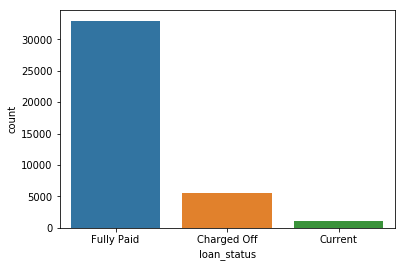

In [579]:
# Counting loan status for all loans

sns.countplot(x = 'loan_status', data = df)
plt.show()

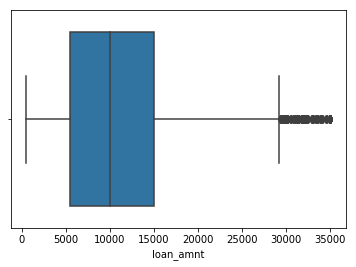

In [580]:
# Getting loan amount in a boxplot.
# This shows most of loan amounts lie in range of (5000, 15000)

sns.boxplot(x=df["loan_amnt"])
plt.show()

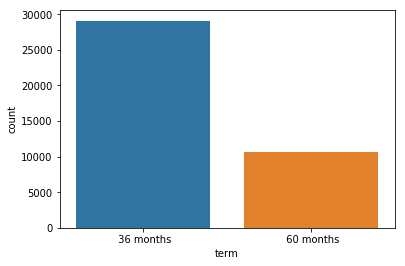

In [581]:
# Plotting term of loan wrt count

sns.countplot(x = 'term', data = df)
plt.show()

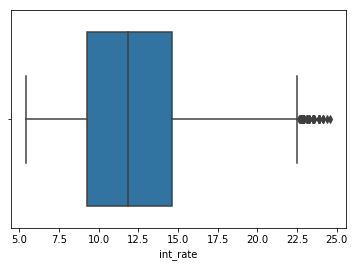

In [582]:
# Getting interest rate in a boxplot.
# This shows most of interest rate lie in range of (8%, 15%)

sns.boxplot(x = df["int_rate"])

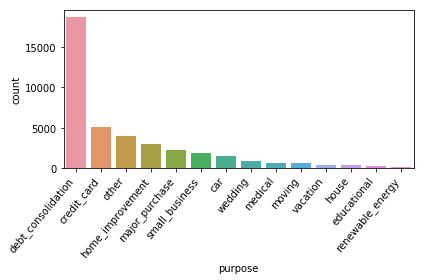

In [583]:
# This plot shows loan purpose distrution with respect to count
# This shows that "debt_consolidation" is the most polular reason for tking loan

ax = sns.countplot(x = 'purpose', data = df, order = df.purpose.value_counts().iloc[:].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, ha = "right")
plt.tight_layout()
plt.show()

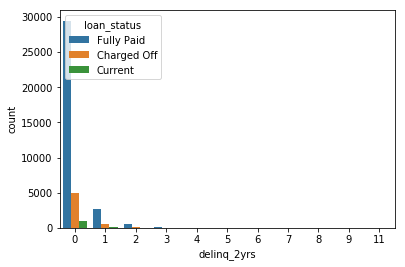

In [584]:
# Plotting loan status against "delinq_2yrs"

sns.countplot(x = 'delinq_2yrs', hue = 'loan_status', data = df)
plt.show()

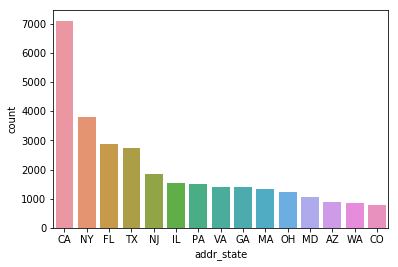

In [585]:
# Plotting top 15 states which take loan
# This shows "CA" has the highest number of loan takers

sns.countplot(x = 'addr_state', data = df, order = df.addr_state.value_counts().iloc[:15].index)
plt.show()

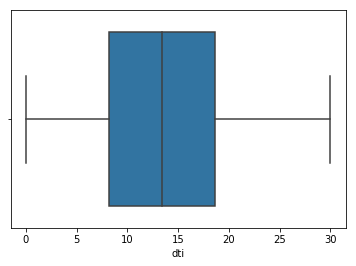

In [586]:
# Getting dti ratio in a boxplot.
# This shows most of dti lie in range of (8, 18)

sns.boxplot(x = df["dti"])

## Adding derived metrics as per our requirements

### Defining a "loan_amnt_range" which will have range of loan taken by customer

In [587]:
# Making loan amount ranges with blocks of $5000

df['loan_amnt_range'] = df['loan_amnt'].apply(lambda x: '\$0-\$05k' if x>=0 and x<=5000
                                                                    else ('\$05-\$10k' if x>5000 and x<=10000
                                                                    else ('\$10-\$15k' if x>10000 and x<=15000
                                                                    else ('\$15-\$20k' if x>15000 and x<=20000
                                                                    else ('\$20-\$25k' if x>20000 and x<=25000
                                                                    else ('\$25-\$30k' if x>25000 and x<=30000
                                                                    else '\$30-\$35k'))))))
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,83.70%,9,5863.155187,5000.00,863.16,0.00,171.62,May-16,0.0,\$0-\$05k
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,9.40%,4,1008.710000,456.46,435.17,0.00,119.66,Sep-13,0.0,\$0-\$05k
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,98.50%,10,3005.666844,2400.00,605.67,0.00,649.91,May-16,0.0,\$0-\$05k
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,21%,37,12231.890000,10000.00,2214.92,16.97,357.48,Apr-16,0.0,\$05-\$10k
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,53.90%,38,3513.330000,2475.94,1037.39,0.00,67.79,May-16,0.0,\$0-\$05k


### Defining a "int_rate_range" which will have range of interest rates taken by customer

In [588]:
df['int_rate_range'] = df['int_rate'].apply(lambda x: '05-08%' if x>=5 and x<=8
                                                                    else ('08-11%' if x>8 and x<=11
                                                                    else ('11-14%' if x>11 and x<=14
                                                                    else ('14-17%' if x>14 and x<=17
                                                                    else ('17-20%' if x>17 and x<=20
                                                                    else ('20-23%' if x>20 and x<=23
                                                                    else '23-26%'))))))
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_range,int_rate_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,9,5863.155187,5000.00,863.16,0.00,171.62,May-16,0.0,\$0-\$05k,08-11%
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,4,1008.710000,456.46,435.17,0.00,119.66,Sep-13,0.0,\$0-\$05k,14-17%
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,10,3005.666844,2400.00,605.67,0.00,649.91,May-16,0.0,\$0-\$05k,14-17%
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,37,12231.890000,10000.00,2214.92,16.97,357.48,Apr-16,0.0,\$05-\$10k,11-14%
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,38,3513.330000,2475.94,1037.39,0.00,67.79,May-16,0.0,\$0-\$05k,11-14%


### Defining a "annual_inc_range" which will have range of annual incomes of customer

In [589]:
df['annual_inc_range'] = df['annual_inc'].apply(lambda x: '0-050k' if x>=0 and x<=50000
                                                                    else ('050k-100k' if x>50000 and x<=100000
                                                                    else ('100k-150k' if x>100000 and x<=150000
                                                                    else ('150k-200k' if x>150000 and x<=200000
                                                                    else ('200k-250k' if x>200000 and x<=250000
                                                                    else '250k+')))))
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_range,int_rate_range,annual_inc_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5863.155187,5000.00,863.16,0.00,171.62,May-16,0.0,\$0-\$05k,08-11%,0-050k
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.710000,456.46,435.17,0.00,119.66,Sep-13,0.0,\$0-\$05k,14-17%,0-050k
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3005.666844,2400.00,605.67,0.00,649.91,May-16,0.0,\$0-\$05k,14-17%,0-050k
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12231.890000,10000.00,2214.92,16.97,357.48,Apr-16,0.0,\$05-\$10k,11-14%,0-050k
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3513.330000,2475.94,1037.39,0.00,67.79,May-16,0.0,\$0-\$05k,11-14%,050k-100k


### Defining a "dti_range" which will have range of debt to income ratios of customer

In [590]:
df['dti_range'] = df['dti'].apply(lambda x: '00-05' if x>=0.0 and x<=5.0
                                                                    else ('05-10' if x>5.0 and x<=10.0
                                                                    else ('10-15' if x>10.0 and x<=15.0
                                                                    else ('15-20' if x>15.0 and x<=20.0
                                                                    else ('20-25' if x>20.0 and x<=25.0
                                                                    else '25-30')))))
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_range,int_rate_range,annual_inc_range,dti_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,863.16,0.00,171.62,May-16,0.0,\$0-\$05k,08-11%,0-050k,25-30
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,119.66,Sep-13,0.0,\$0-\$05k,14-17%,0-050k,00-05
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,605.67,0.00,649.91,May-16,0.0,\$0-\$05k,14-17%,0-050k,05-10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,357.48,Apr-16,0.0,\$05-\$10k,11-14%,0-050k,15-20
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,2475.94,1037.39,0.00,67.79,May-16,0.0,\$0-\$05k,11-14%,050k-100k,15-20


In [591]:
# Adding "issue_year" column to get issue year from "issue_d"

df['issue_year'] = '20' + df.issue_d.str.split('-').apply(lambda x: x[1])

## SEGMENTED UNIVARIATE ANALYSIS

In [592]:
# We will segment dataframe
# The current and paid off loan are removed for further analysis

default_df = df[df.loan_status == "Charged Off"]
default_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_range,int_rate_range,annual_inc_range,dti_range,issue_year
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.0,119.66,Sep-13,0.0,\$0-\$05k,14-17%,0-050k,00-05,2011
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,294.94,0.0,152.39,Aug-12,0.0,\$05-\$10k,20-23%,0-050k,05-10,2011
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,533.42,0.0,121.45,Mar-13,0.0,\$05-\$10k,11-14%,0-050k,15-20,2011
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,570.26,0.0,305.38,Nov-12,0.0,\$05-\$10k,11-14%,0-050k,10-15,2011
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,...,1393.42,0.0,325.74,Mar-14,0.0,\$05-\$10k,08-11%,050k-100k,05-10,2011


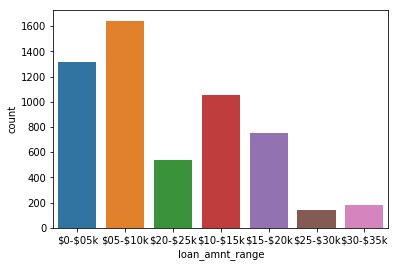

In [593]:
# Plotting "loan_amnt_range" with count
# Loan amount upto 10K are more likely to default

sns.countplot(x = 'loan_amnt_range', data = default_df)
plt.show()

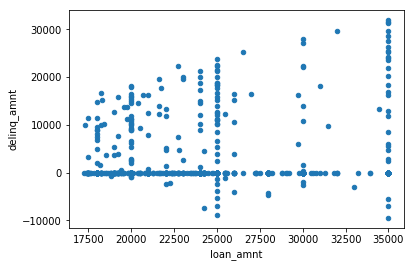

In [594]:
# To find correlation between the amount and deliquincy, if higher loan amount leads to defaulters

df['delinq_amnt'] = np.where(df['loan_status']== 'Charged Off',df['loan_amnt']- df['total_pymnt'],0)

df[df['loan_amnt'] > 17053].sample(1000).plot.scatter(x='loan_amnt', y='delinq_amnt')

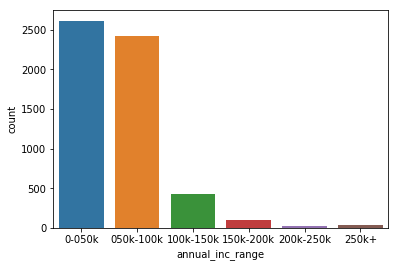

In [595]:
# Plotting "annual_inc_range" with count
# Loan amount upto $100K are more likely to default

sns.countplot(x = 'annual_inc_range', data = default_df)
plt.show()

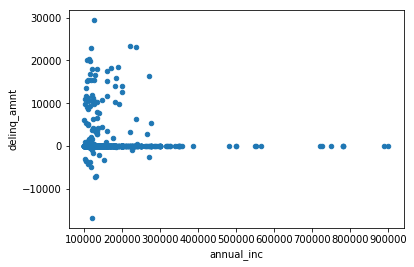

In [596]:
# To find correlation between the income and deliquincy, if lower income leads to defaulters

df[df['annual_inc']> 100000].sample(1000).plot.scatter(x='annual_inc', y='delinq_amnt')

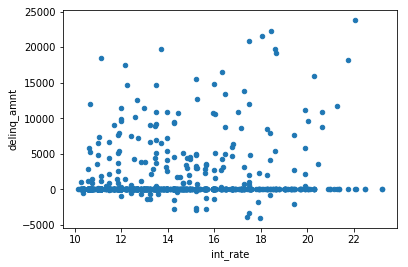

In [597]:
# To find correlation between the interest rate and deliquincy, if higher interest rate leads to defaulters

df[df['int_rate']> 10].sample(1000).plot.scatter(x='int_rate', y='delinq_amnt')

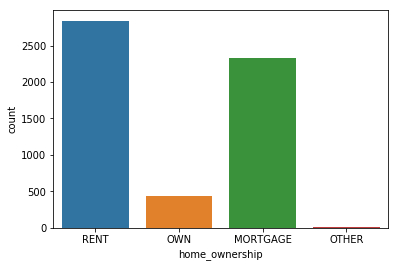

In [598]:
# Plotting "home_ownership" with count
# People with Own house are less likely to default in a loan

sns.countplot(x = 'home_ownership', data = default_df)
plt.show()

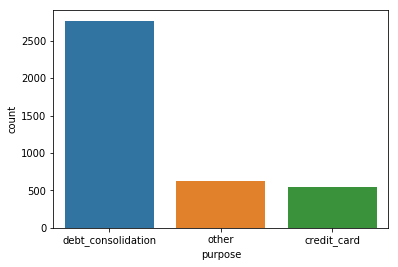

In [599]:
# Plotting "purpose" with count
# Its clear that loan taken for "Debt consolidation" has major default and one of the driving factores for default

sns.countplot(x = 'purpose', data = default_df, order = default_df.purpose.value_counts().iloc[:3].index)
plt.show()

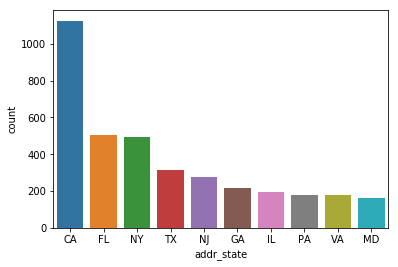

In [600]:
# Plotting "addr_state" with count
# Loan requistion from CA is more likely to be default

sns.countplot(x = 'addr_state', data = default_df, order = default_df.addr_state.value_counts().iloc[:10].index)
plt.show()

## By above analysis, we can conclude that factors which contribute to loan default are (not in any particular order) -
### - Annual Income
### - Interest Rate
### - Public Bankruptcy Record
### - Debt-Income Ratio
### - Loan Amount

### We will now identify corelation between "loan_status" and various factors which assist in determining if a factor leads to default

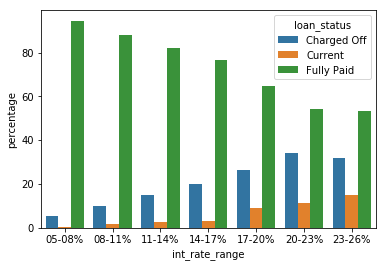

In [601]:
# This shows as "int_rate_range" increase, loan default is increased and fully paid is decreased

P = df.groupby(['int_rate_range', 'loan_status']).agg({'id': 'count'})
P['percentage'] = P.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
ax = sns.barplot(x="int_rate_range", y="percentage", hue="loan_status", data=P.reset_index())

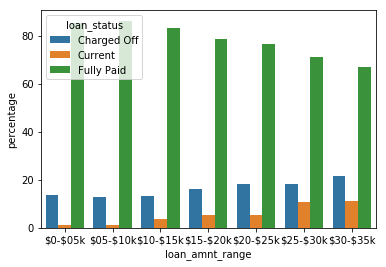

In [602]:
# This shows as "loan_amnt_range" increase, loan default is increased and fully paid is decreased

P = df.groupby(['loan_amnt_range', 'loan_status']).agg({'id': 'count'})
P['percentage'] = P.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
sns.barplot(x="loan_amnt_range", y="percentage", hue="loan_status", data=P.reset_index())

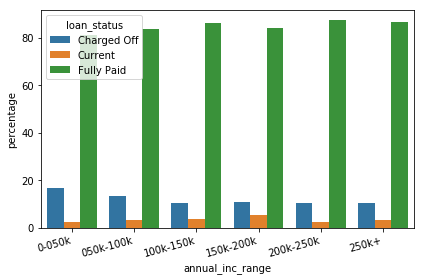

In [603]:
# This shows as "annual_inc_range" increase, loan default is increased and fully paid is decreased

P = df.groupby(['annual_inc_range', 'loan_status']).agg({'id': 'count'})
P['percentage'] = P.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
ax = sns.barplot(x="annual_inc_range", y="percentage", hue="loan_status", data=P.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
plt.tight_layout()
plt.show()

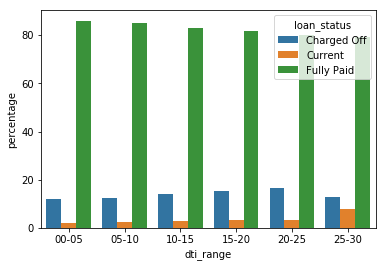

In [604]:
# This shows as "dti_range" increase, loan default is increased and fully paid is decreased

P = df.groupby(['dti_range', 'loan_status']).agg({'id': 'count'})
P['percentage'] = P.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
sns.barplot(x="dti_range", y="percentage", hue="loan_status", data=P.reset_index())

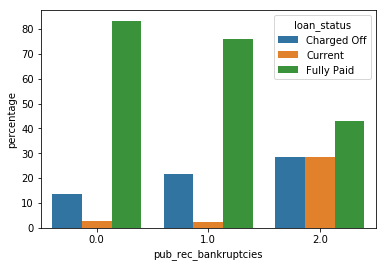

In [605]:
# This shows as "pub_rec_bankruptcies" increase, loan default is increased and fully paid is decreased

P = df.groupby(['pub_rec_bankruptcies', 'loan_status']).agg({'id': 'count'})
P['percentage'] = P.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
sns.barplot(x="pub_rec_bankruptcies", y="percentage", hue="loan_status", data=P.reset_index())

In [606]:
# A heat map is plotted to find the corelation between various parameters

defaultnew = df[["installment","annual_inc","dti","delinq_2yrs","inq_last_6mths","open_acc","revol_util", "int_rate", "revol_bal","total_acc", "pub_rec_bankruptcies"]]
corr = defaultnew.corr()
corr.style.background_gradient(cmap='PiYG')

,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,int_rate,revol_bal,total_acc,pub_rec_bankruptcies
installment,1,0.270874,0.0541857,-0.0196565,0.00972221,0.172812,0.282703,0.312679,0.230824,-0.0337458
annual_inc,0.270874,1,-0.122732,0.0230833,0.0339079,0.1582,0.0531852,0.279961,0.235771,-0.0165136
dti,0.0541857,-0.122732,1,-0.0344516,0.00140517,0.288045,0.111162,0.228743,0.229881,0.00702108
delinq_2yrs,-0.0196565,0.0230833,-0.0344516,1,0.00809054,0.0116561,0.157916,-0.0551248,0.0678923,0.00295357
inq_last_6mths,0.00972221,0.0339079,0.00140517,0.00809054,1,0.0917134,0.133013,-0.0223814,0.111499,0.0156523
open_acc,0.172812,0.1582,0.288045,0.0116561,0.0917134,1,0.0103949,0.288964,0.686635,0.00576265
int_rate,0.282703,0.0531852,0.111162,0.157916,0.133013,0.0103949,1,0.0971,-0.0435702,0.0835786
revol_bal,0.312679,0.279961,0.228743,-0.0551248,-0.0223814,0.288964,0.0971,1,0.313602,-0.048876
total_acc,0.230824,0.235771,0.229881,0.0678923,0.111499,0.686635,-0.0435702,0.313602,1,-0.0107575
pub_rec_bankruptcies,-0.0337458,-0.0165136,0.00702108,0.00295357,0.0156523,0.00576265,0.0835786,-0.048876,-0.0107575,1


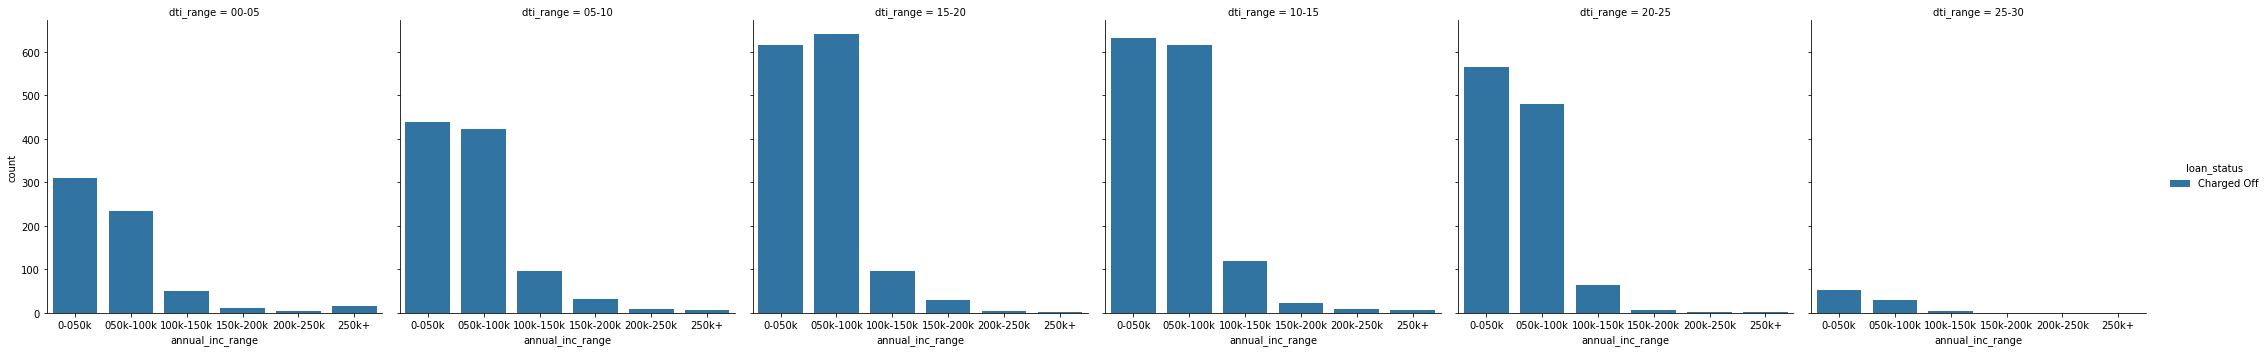

In [607]:
# This plot shows people with annual income in range ($0-$100k) and debt-income retio between (10-20)
# are likely to default most

sns.catplot(x = "annual_inc_range", hue = "loan_status", col = "dti_range", data = default_df, kind = "count")

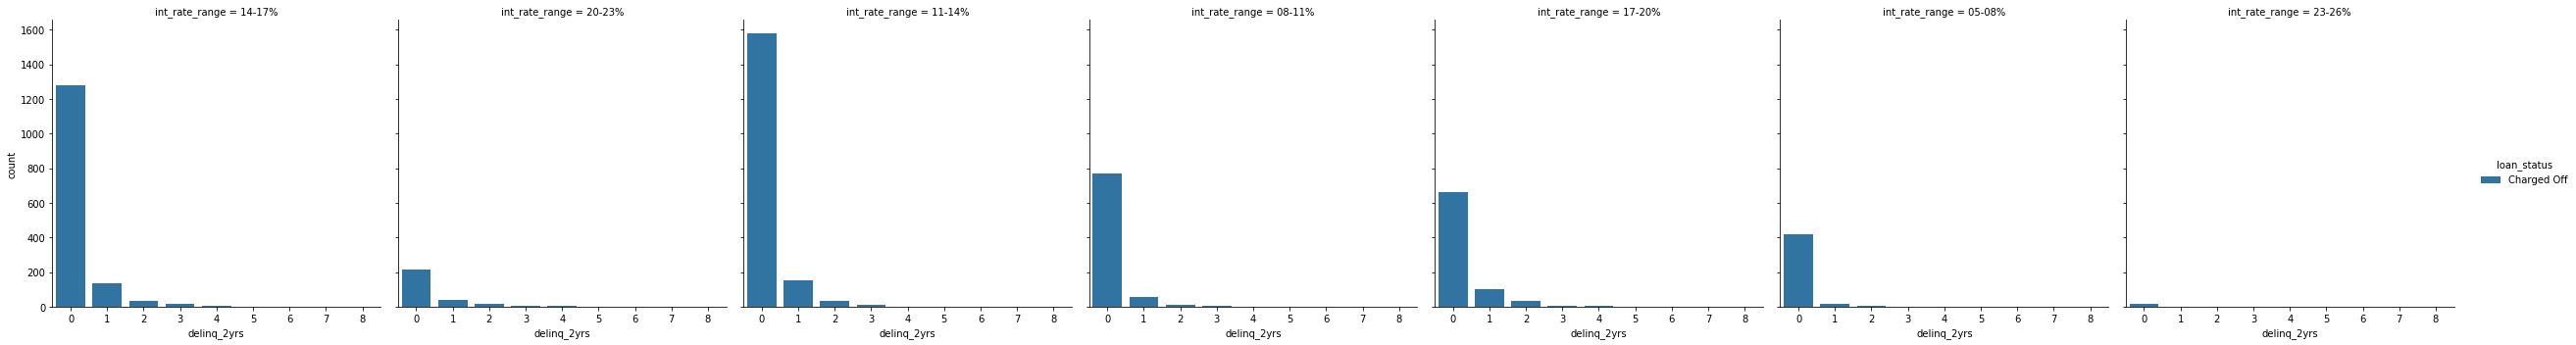

In [608]:
# This plot shows people with "delinq_2yrs" > 0 and int_rate_range between (14-20)
# are likely to default most

sns.catplot(x = "delinq_2yrs", hue = "loan_status", col = "int_rate_range", data = default_df, kind = "count")
